<a href="https://colab.research.google.com/github/MailenGonzalez/PDI_UNS/blob/main/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo Practico Nro 2 - 
 *Realizado por Mailen Gonzalez*
 
## Parte 1
**El workflow implementado consiste en los siguientes pasos:**

1.   Normalizar los valores RGB del pixel
2.   Convertir RGB a YIQ
3.   Cambiar el coeficiente de luminancia
4.   Cambiar el coeficiente de saturación
5.   Chequear los rangos de Y, I y Q
6.   Convertir Y'I'Q' a R'G'B'
7.   Graficar




*Importamos bibliotecas necesarias:*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

*Definimos funciones a utilizar:*



In [ ]:
#convierte la imagen a una matriz numpy
def imageToArray(img):
  return np.array(img)

#Levanta una imagen dada  
def getImage(path):
  image = imread(path)
  return image

#establece rango (0..1)
def normalizeImg(img):
  return img/255

#Transforma de RGB a YIQ
def toYIQ(img):
  yiq_matrix = np.array([[0.299, 0.587, 0.114],[ 0.595716, -0.274453, -0.321263],[0.211456, -0.522591, 0.311135]])
  return np.dot(img, yiq_matrix.T)

#Modifica el canal Y, modificando el coeficiente de luminancia
def changeAlpha(img, alpha):
  yiq_alpha = np.copy(img)
  yiq_alpha[:,:,0] *= alpha
  return yiq_alpha

#Modifica el canal I y Q, modificando el coeficiente de saturación
def changeBeta(img, beta):
  yiq_beta_i = np.copy(img)
  yiq_beta_i[:,:,1] *= beta
  yiq_beta_q = np.copy(yiq_beta_i)
  yiq_beta_q[:,:,2] *= beta
  return yiq_beta_q

#Chequea el rango de Y, I y Q
def checkRanges(img):
  img_ranges = np.copy(img)
  img_ranges[:,:,0] = np.clip(img_ranges[:,:,0], None, 1)
  img_ranges[:,:,1] = np.clip(img_ranges[:,:,1], -0.5957, 0.5957)
  img_ranges[:,:,1] = np.clip(img_ranges[:,:,1], -0.5226, 0.5226)
  return img_ranges

#grafica una imagen
def plotImage(img, colormap=None):
  plt.imshow(img, cmap=colormap);
  if colormap != None:
    plt.colorbar()
  
#convierte una imagen de YIQ a RGB
def toRGB(img):
  rgb_matrix = np.array([[1, 0.9663, 0.6210],[ 1, -0.2721, -0.6474],[1, -1.1070, 1.7046]])
  return np.dot(img, rgb_matrix.T)

#Separa los canales r,g y b de una imagen. 
def getRGB(img):
  r = img[:,:,0]
  g = img[:,:,1]
  b = img[:,:,2]  
  return r,g,b

*Una vez definidas las funciones a utilizar, abrimos una imagen (seleccionar del menú desplegable), luego la convertimos en un arreglo de numpy y la normalizamos.* 

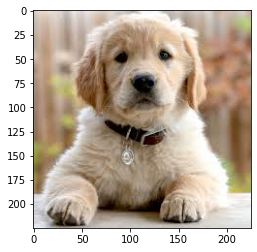

In [ ]:
#@title Selecccione una Imagen. { run: "auto" }


Nature = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTRJo9ajFFSbo7wjPkhLRCQwRVZ1ASabC6qOw&usqp=CAU'
Dog = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ8D-G0b8ka5kyWMioBDY98SOJCYt8Xy7kklA&usqp=CAU'
image = 'Dog' #@param ["Dog", "Nature"]

if image == 'Nature':
  img = getImage(Nature)
  plotImage(img)
elif image == 'Dog':
  img= getImage(Dog)
  plotImage(img)



In [ ]:
#abrir imagen, transformar en matriz y normalizar
rgb_mat = imageToArray(img)
rgb_mat = normalizeImg(rgb_mat)

#convertimos la imagen de RGB a YIQ
yiq_mat = toYIQ(rgb_mat)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


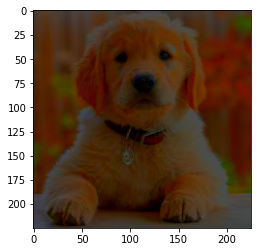

In [ ]:
#@title Modifique alpha y beta { run: "auto" }
def visualize(img, alpha, beta):
  yiq_alpha = changeAlpha(img, alpha)
  yiq_beta = changeBeta(yiq_alpha, beta)
  yiq_mat = checkRanges(yiq_beta)
  rgb_mat = toRGB(yiq_mat)
  plotImage(rgb_mat)

#Modificamos alpha y beta y visualizamos la imagen resultante
alpha = 0.3 #@param {type:"slider", min:0, max:2, step:0.1}
beta = 1.6 #@param {type:"slider", min:0, max:2, step:0.1}
visualize(yiq_mat, alpha, beta)

##Resultados y conclusiones Parte 1

Podemos concluir que si modificamos el valor de alpha, la imagen sufre cambios. A medida que disminuimos el valor de alpha, la luminancia disminuye, es decir que vemos una imagen mas oscura (aunque la cromaticidad no se ve afectada). En caso contrario, cuando aumentamos el valor de alpha, vemos que el brillo de la imagen aumenta. Debemos controlar que el valor del canal Y no supere el valor 1 ya que sino aparecen artefactos indeseados en la imagen resultante. 

En el caso de cambiar el valor de beta, vamos a afectar a la cromaticidad de la imagen. A medida que disminuimos el valor de beta, la cromaticidad va disminuyendo hasta conseguir una imagen en tonos de grises. En caso contrario, a medida que aumentamos el valor de beta, vemos como los colores empiezan a saturar. 



#Trabajo Practico Nro 2 - Parte 2

El trabajo consiste en utilizar datasets 2D y visualizarlos con diferentes paletas o mapas de color. 



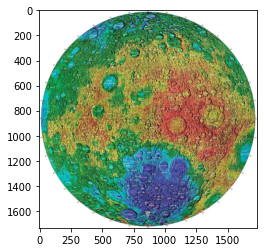

In [ ]:
#@title Selecccione una Imagen. { run: "auto" }
Coins = 'https://d1lfxha3ugu3d4.cloudfront.net/images/opencollection/archives/size2/S03i3165l01.jpg'
World = 'https://raw.githubusercontent.com/MailenGonzalez/PDI_UNS/main/topografia.jpg'

image = 'World' #@param ["World", "Coins"]

if image == 'World':
  img = getImage(World)
  plotImage(img)
elif image == 'Coins':
  img= getImage(Coins)
  plotImage(img)


*Convertimos la imagen RGB a escala de grises (principalmente la imagen del mundo que esta en RGB)*


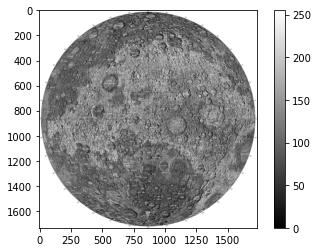

In [ ]:
r,g,b = getRGB(img)
img_gray = 0.299*r + 0.587*g + 0.114*b
plotImage(img_gray, 'gray')

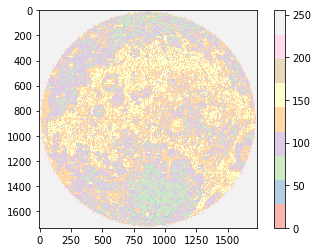

In [ ]:
#@title Choose a color map. { run: "auto" }
def change_cmap(img,palette):
  plotImage(img, cmap)
  

cmap = 'Pastel1' #@param ["tab20","Pastel1","Blues", "twilight", "flag", "gray"]
change_cmap(img_gray,cmap)

## Resultados y conclusiones Parte 2

Lo primero que se hizo en esta parte fue transformar las imagenes en rgb (en el caso de la imagen de las monedas queda igual). Luego probamos diferentes mapas de colores. 

Depende el tipo de mapa, podemos obtener distintos resultados. En el caso del mapa **Flag**, vemos como desaparece la forma de la imagen completamente, debido al tipo de mapa, que es ciclico y varias intensidades toman el mismo valor de color. 
En el caso de las paletas mas graduales, como es el caso de **Blues** y **Gray**, la forma de la imagen se mantiene y además se sigue manteniendo la relación de que cuanto mas oscuro es el pixel, mas claro o oscuro es el valor que lo representa por ejemplo. Se puede observar sin cambios la estructura y la relación de profundidad
En el caso de las paletas tipo **Pastel1**, al no tener una escala en degrade se pierden algunos detalles de la imagen o es mas dificil de reconocer el valor del pixel a simple vista (salvo que miremos su valor en la escala).